## 0. Libraries

In [42]:
import pandas as pd

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
import numpy as np

In [45]:
import shutup
shutup.please()

In [46]:
# pip install shap

In [47]:
import sklearn
import shap
import os

## 1. Data Extraction

Going through the columns and seeing if we need to change a values in the dataset.

In [48]:
df = pd.read_csv("C:/Space X/Documents/ML/Customer-Churn-Project/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [51]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## 2. Encoding the categorical values

### 2.1 Binary encoding

We have found a few columns that need to be encoded into binary values. Will be covering that in the coming steps. 

In [52]:
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]
df[binary_cols] = df[binary_cols].replace({
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0
})

In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### 2.2 One Hot Encoding

There are a few columns which have more than 2 unique values. Will be using this to one-hot encode or generate dummies. 

In [54]:
one_hot_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [55]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 3. Cleaning

Dropping the customerID column, because it is no way useful.

In [57]:
df.drop('customerID', axis=1, inplace=True)

In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [59]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [60]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

### 3.1 Boolean conversion

There are a lot of Boolean columns as you can see, we need to convert all of these into integers so it is easily processable. 

In [61]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [62]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No inter

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

### 3.2 Correlation of Features with Churn

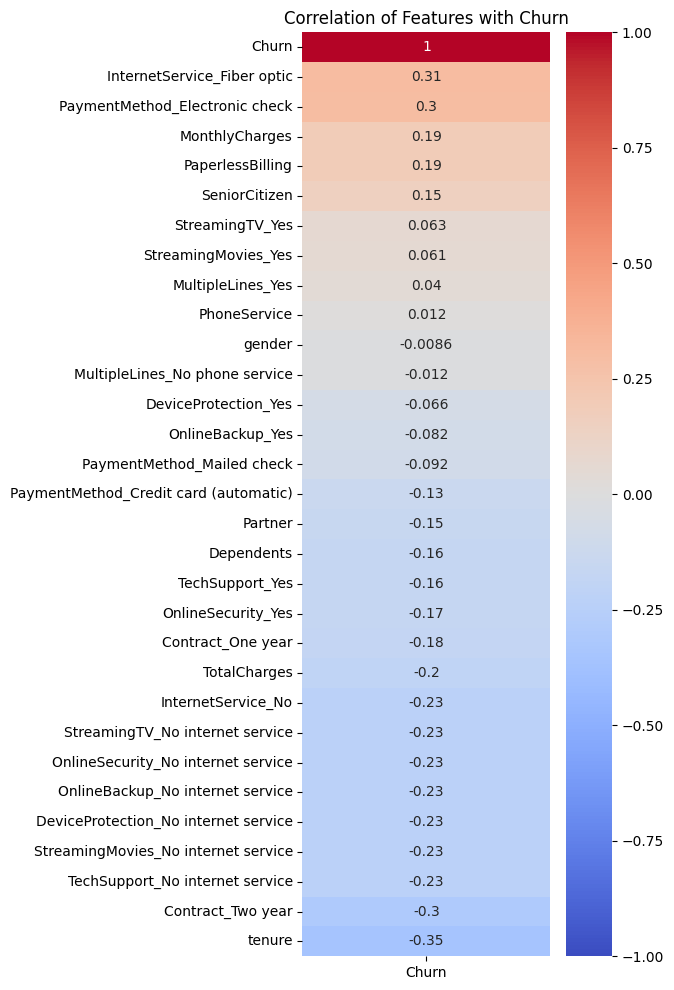

In [64]:
corr_matrix = df.corr(numeric_only=True)

churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending=False)

plt.figure(figsize=(4, 12))
sns.heatmap(churn_corr, annot=True,cmap = 'coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()

Higher value to 1 represents that the customers with this feature are more likely to churn. 

Values closer to -1 represents the customers that are less likely to churn. 

## 4. Preprocessing

### 4.1 Checking for redundant features (VIF)

In [65]:
df['No_internet_service'] = (
    df['OnlineSecurity_No internet service'] |
    df['OnlineBackup_No internet service'] |
    df['DeviceProtection_No internet service'] |
    df['TechSupport_No internet service'] |
    df['StreamingTV_No internet service'] |
    df['StreamingMovies_No internet service']
).astype(int)

drop_cols = [col for col in df.columns if 'No internet service' in col]
df = df.drop(columns=drop_cols)

if 'MultipleLines_No phone service' in df.columns:
    df['No_phone_service'] = df['MultipleLines_No phone service'].astype(int)
    df = df.drop(columns=['MultipleLines_No phone service'])

In [66]:
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

c:\Users\sid99\AppData\Local\Python\pythoncore-3.11-64\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  feature          VIF
11                     InternetService_No          inf
23                    No_internet_service          inf
5                            PhoneService  1773.528816
7                          MonthlyCharges   866.089640
10            InternetService_Fiber optic   148.500814
24                       No_phone_service    60.842267
17                    StreamingMovies_Yes    24.156394
16                        StreamingTV_Yes    24.080019
8                            TotalCharges    10.811490
4                                  tenure     7.584453
9                       MultipleLines_Yes     7.289761
14                   DeviceProtection_Yes     6.924754
13                       OnlineBackup_Yes     6.796678
15                        TechSupport_Yes     6.476508
12                     OnlineSecurity_Yes     6.338349
19                      Contract_Two year     2.652328
21         PaymentMethod_Electronic check     1.976032
22        

## 5. Machine Learning

In [68]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

### 5.1 RandomForest Classifier

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3

In [70]:
rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.886     0.770     0.824      1035
           1      0.532     0.725     0.614       374

    accuracy                          0.758      1409
   macro avg      0.709     0.747     0.719      1409
weighted avg      0.792     0.758     0.768      1409



In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.505   0.791   0.617   
0.3     0.532   0.725   0.614   
0.35    0.549   0.671   0.604   
0.4     0.573   0.620   0.596   
0.45    0.597   0.551   0.573   
0.5     0.624   0.492   0.550   


### 5.2 LightGBM Classifier

In [72]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
⏱ Training time: 2.29 seconds
⏱ Prediction time: 0.0089 seconds
              precision    recall  f1-score   support

           0      0.914     0.702     0.795      1035
           1      0.498     0.818     0.619       374

    accuracy                          0.733      1409
   macro avg      0.706     0.760     0.707      1409
weighted avg      0.804     0.73

In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.479   0.842   0.610   
0.3     0.498   0.818   0.619   
0.35    0.507   0.786   0.616   
0.4     0.524   0.757   0.619   
0.45    0.537   0.741   0.622   
0.5     0.552   0.701   0.617   


### 5.3 XGBoost Classifier

In [74]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 2.24 seconds
⏱ Prediction time: 0.0107 seconds
              precision    recall  f1-score   support

           0      0.910     0.691     0.785      1035
           1      0.486     0.810     0.608       374

    accuracy                          0.722      1409
   macro avg      0.698     0.750     0.697      1409
weighted avg      0.797     0.722     0.738      1409



In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.464   0.834   0.596   
0.3     0.486   0.810   0.608   
0.35    0.498   0.786   0.610   
0.4     0.517   0.751   0.612   
0.45    0.538   0.719   0.616   
0.5     0.546   0.687   0.608   


## 6. Hyperparameter Tuning

In [40]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)  
    return recall_score(y_test, y_pred, pos_label=1)  

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

[I 2025-11-11 15:39:23,800] A new study created in memory with name: no-name-c3f48947-0a43-47c6-859e-c1d05773ba74
[I 2025-11-11 15:39:24,027] Trial 0 finished with value: 0.8743315508021391 and parameters: {'n_estimators': 693, 'learning_rate': 0.19708876439081266, 'max_depth': 7, 'subsample': 0.7748266793295788, 'colsample_bytree': 0.7650214459469855, 'min_child_weight': 8, 'gamma': 4.20382394434043, 'reg_alpha': 1.310473416713191, 'reg_lambda': 2.6375956465345003}. Best is trial 0 with value: 0.8743315508021391.
[I 2025-11-11 15:39:24,177] Trial 1 finished with value: 0.9064171122994652 and parameters: {'n_estimators': 382, 'learning_rate': 0.10784844730523227, 'max_depth': 5, 'subsample': 0.8136351062451046, 'colsample_bytree': 0.6773624482279454, 'min_child_weight': 2, 'gamma': 3.7936982095147536, 'reg_alpha': 2.4427284249720187, 'reg_lambda': 1.4063232008197157}. Best is trial 1 with value: 0.9064171122994652.
[I 2025-11-11 15:39:24,476] Trial 2 finished with value: 0.893048128342

Best Params: {'n_estimators': 452, 'learning_rate': 0.04407149815211131, 'max_depth': 4, 'subsample': 0.9998837632391531, 'colsample_bytree': 0.8559381003633442, 'min_child_weight': 4, 'gamma': 3.399206142218213, 'reg_alpha': 4.784635516663425, 'reg_lambda': 2.413629386952107}
Best Recall: 0.9278074866310161


In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

xgb = XGBClassifier(**best_params)

start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.22 seconds
⏱ Prediction time: 0.0032 seconds
              precision    recall  f1-score   support

           0      0.955     0.552     0.699      1035
           1      0.428     0.928     0.586       374

    accuracy                          0.652      1409
   macro avg      0.691     0.740     0.642      1409
weighted avg      0.815     0.652     0.669      1409



## 7. Experimentation

In [76]:
import mlflow
import mlflow.xgboost  # or mlflow.xgboost
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

In [77]:
from mlflow.models import infer_signature


In [78]:
import mlflow
import os

# Check current tracking URI
print("Current tracking URI:", mlflow.get_tracking_uri())


Current tracking URI: http://127.0.0.1:5000/


In [79]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")
mlflow.set_experiment("Customer Churn - XGBoost")

# # === CRITICAL: Reset tracking URI ===
# if 'MLFLOW_TRACKING_URI' in os.environ:
#     del os.environ['MLFLOW_TRACKING_URI']
# mlflow.tracking._tracking_service.utils._tracking_uri = None

# mlflow_dir = r"c:\Space X\Documents\ML\Customer-Churn-Project\mlruns"
# os.makedirs(mlflow_dir, exist_ok=True)
# mlflow.set_tracking_uri(f"file:///{mlflow_dir.replace(chr(92), '/')}")

# print(f"✓ Tracking URI: {mlflow.get_tracking_uri()}")
# # === End reset ===

<Experiment: artifact_location='mlflow-artifacts:/550388828810184910', creation_time=1762892695394, experiment_id='550388828810184910', last_update_time=1762892695394, lifecycle_stage='active', name='Customer Churn - XGBoost', tags={}>

In [82]:
THRESHOLD

0.3

In [ ]:
# export MLFLOW_TRACKING_URI=sqlite:///mlruns/mlflow.db
# mlflow run . -P alpha=0.5

In [80]:
with mlflow.start_run():
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })

    mlflow.log_params(best_params)

    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric("train_time", train_time)


    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)


    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)
    
    signature = infer_signature(X_train, xgb.predict_proba(X_train))



    # print("Logging model...")
    # mlflow.xgboost.log_model(
    #     xgb, 
    #     "model",
    #     signature=signature,
    #     input_example=X_train.iloc[:5] if hasattr(X_train, 'iloc') else X_train[:5]
    # )
    # print("✓ Model logged successfully!")

    print(classification_report(y_test, y_pred, digits=3))

2025/11/11 15:40:26 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



              precision    recall  f1-score   support

           0      0.955     0.552     0.699      1035
           1      0.428     0.928     0.586       374

    accuracy                          0.652      1409
   macro avg      0.691     0.740     0.642      1409
weighted avg      0.815     0.652     0.669      1409

🏃 View run stately-yak-270 at: http://127.0.0.1:5000/#/experiments/550388828810184910/runs/42a8bbb6864948e688e79270295ee270
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/550388828810184910


### 8. SHAP

In [84]:
# creating an explainer for the model
explainer = shap.TreeExplainer(xgb)

In [85]:
shap_values = explainer.shap_values(X_train)

In [86]:
print('Expected Value:', explainer.expected_value)


Expected Value: -0.0019369845


In [89]:
pd.DataFrame(shap_values,columns=X_train.columns).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,No_internet_service,No_phone_service
0,0.006113,-0.027604,0.0,0.027323,-0.411484,0.139366,-0.199317,-0.068213,-0.120865,-0.024599,-0.377563,0.076916,0.074343,0.014695,0.0,0.079839,0.080904,0.061055,0.120777,0.266713,-0.001310,0.267158,0.0,0.009488,0.036979
1,0.004710,-0.030003,0.0,-0.051829,-0.072935,-0.011718,-0.216064,-0.091288,0.064286,-0.048525,0.321871,0.071375,-0.163597,0.009220,0.0,0.021694,-0.035845,-0.064241,0.263369,0.335056,-0.002056,-0.175678,0.0,0.007284,-0.001086
2,0.004008,-0.036928,0.0,-0.065960,0.065097,0.047479,-0.131202,-0.262708,-0.004211,-0.027493,-0.225684,0.055140,-0.091065,-0.015647,0.0,-0.082258,-0.024633,-0.038168,0.093273,-1.615839,-0.002056,-0.165728,0.0,0.006213,0.006133
3,-0.005304,-0.035204,0.0,0.013418,-0.221838,-0.031111,0.071316,-0.244329,-0.095454,-0.057583,-0.263570,0.058636,0.053642,0.004071,0.0,0.069321,0.041479,0.076363,0.070819,-1.683753,0.004188,-0.207062,0.0,0.006616,-0.008758
4,0.004400,-0.021603,0.0,-0.060995,0.817366,-0.015005,-0.231038,-0.064361,0.151518,-0.027573,-0.353016,0.089426,0.055983,0.026520,0.0,0.049336,-0.030739,-0.051281,0.211273,0.323787,-0.001116,0.241741,0.0,0.013759,-0.002211


In [97]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[0,:], X_train.iloc[0,:])

In [101]:
shap_values.shape

(5634, 25)

In [103]:
X_test.shape

(1409, 25)

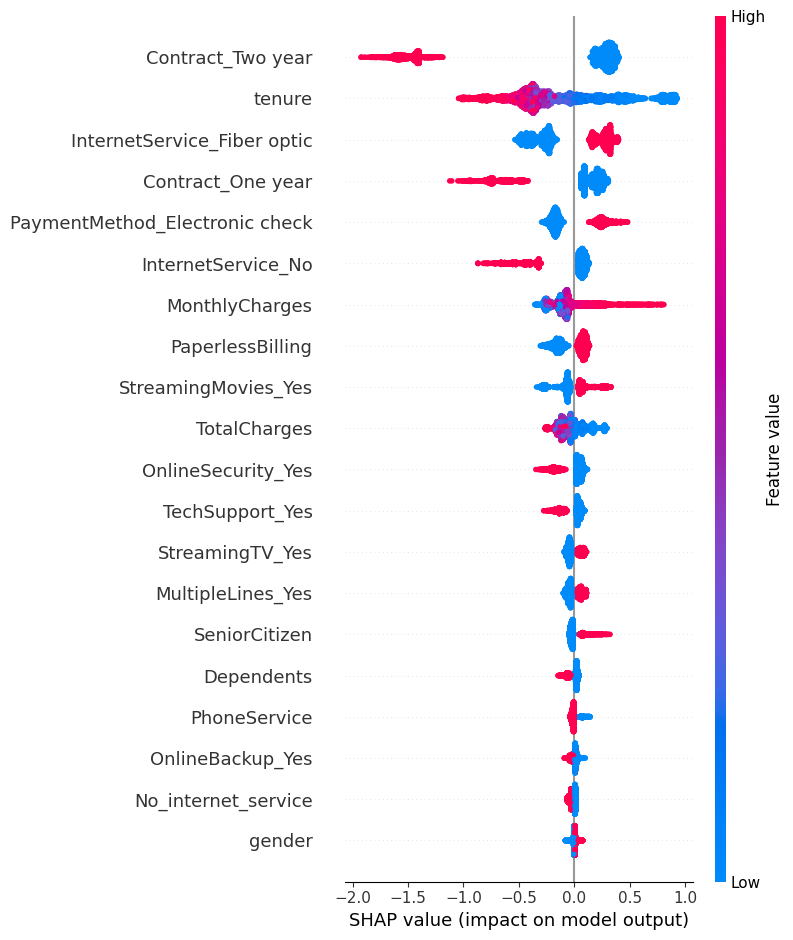

In [105]:
shap.initjs()
shap.summary_plot(shap_values, X_train)

In [107]:
explainer = shap.TreeExplainer(xgb)
shap_values_test = explainer.shap_values(X_test)

In [109]:
y_pred=xgb.predict(X_test)
misclassified=y_test!=y_pred
sum(misclassified)

355

In [110]:
pred_true_tbl=pd.DataFrame({'True':y_test,'Pred':y_pred,'Misclassified':misclassified})
display(pred_true_tbl[pred_true_tbl.Misclassified==True])
print(np.where(pred_true_tbl.Misclassified==True)) 

,True,Pred,Misclassified
2280,0,1,True
4460,0,1,True
5748,0,1,True
3568,0,1,True
2079,0,1,True
2136,0,1,True
1838,0,1,True
6979,0,1,True
3624,0,1,True
2488,1,0,True


(array([   1,    3,    5,    6,   10,   17,   30,   31,   35,   39,   41,
         42,   46,   47,   53,   54,   61,   66,   67,   68,   82,   85,
         86,   91,   96,  102,  111,  113,  117,  142,  148,  149,  151,
        153,  155,  156,  165,  167,  170,  174,  175,  178,  191,  194,
        195,  196,  198,  199,  200,  208,  210,  211,  212,  217,  219,
        222,  224,  229,  232,  237,  239,  249,  257,  258,  259,  260,
        265,  268,  269,  270,  272,  275,  277,  280,  282,  284,  286,
        290,  296,  297,  302,  310,  311,  320,  321,  324,  326,  327,
        330,  331,  345,  351,  357,  365,  369,  371,  372,  373,  374,
        377,  378,  381,  383,  385,  392,  401,  406,  407,  416,  418,
        422,  425,  426,  427,  439,  444,  445,  448,  449,  450,  454,
        461,  462,  467,  470,  476,  477,  480,  481,  484,  489,  490,
        491,  493,  495,  499,  501,  502,  511,  518,  521,  524,  527,
        530,  532,  534,  539,  540,  548,  550,  

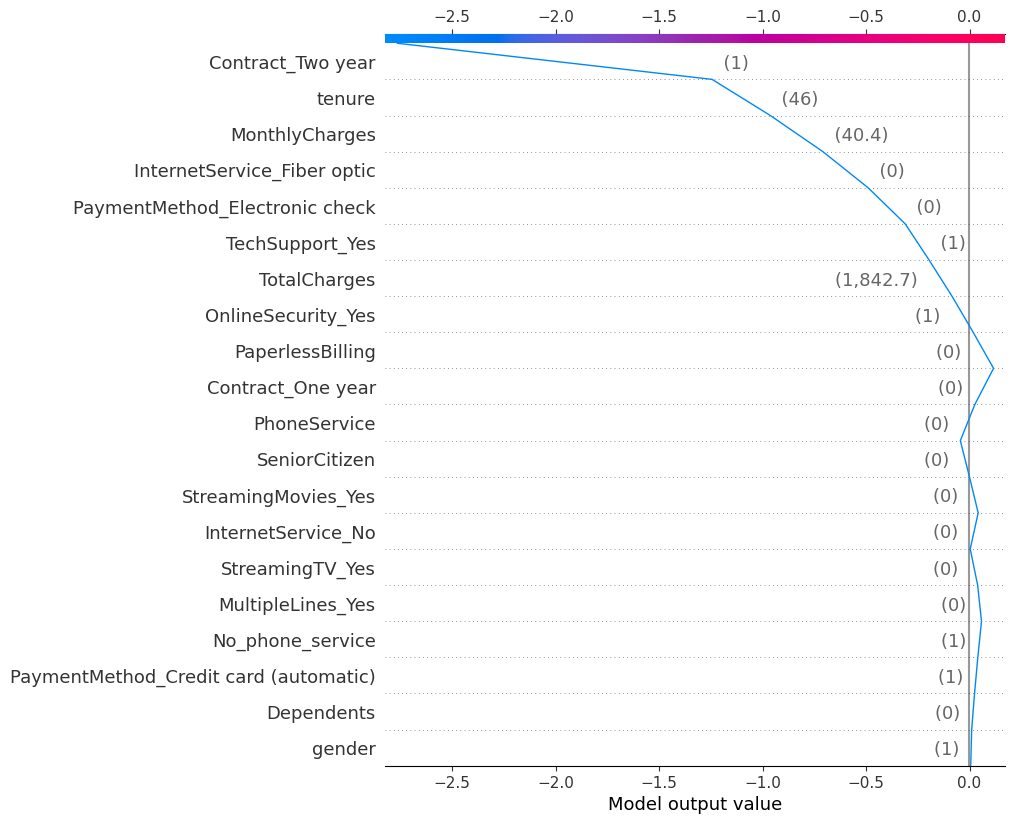

In [114]:
shap.initjs()
shap.decision_plot(explainer.expected_value, 
                shap_values_test[150,:], X_test.iloc[150,:])